## Reconstruction of coal-ice melting  

Author: atekawade@anl.gov, Aniket Tekawade  
Data contributor: nikitinvv@anl.gov, Viktor Nikitin  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import sys
sys.path.append('../')
from recon4D import DataGetter
from ct_segnet import viewer
from ct_segnet.data_utils.data_io import DataFile

In [2]:
fnames = ['/data02/MyArchive/coalice/melting_086.h5', \
          '/data02/MyArchive/coalice/flat_fields_melting_086.h5', \
          '/data02/MyArchive/coalice/dark_fields_melting_086.h5']
ntheta = 361 # these many projections per 180 degree spin
recon_params = {"mask_ratio" : None, \
                "contrast_s" : 0.01, "vert_slice" : slice(300,302,None)}
recon_path = '/data02/MyArchive/coalice/recons'

In [3]:
hf = h5py.File(fnames[0], 'r')
delta_t = hf['measurement/instrument/detector/exposure_time'][:]
# pixel_size = hf['measurement/instrument/detector/pixel_size'][:]
hf.close()

In [4]:
dget = DataGetter(*fnames, ntheta)
idx_list = [0, 720*5, 720*10, 720*15, 720*20, 720*25]
imgs = []
t_vals = []
center_val = dget.find_center(0)

Shape of projection image: (1, 600, 960)
center = 471.00


In [5]:
for idx in idx_list:
    img_t = dget.reconstruct_window(idx,center_val, **recon_params)[0]
    imgs.append(img_t)
    t_vals.append(idx*delta_t)
    # save it
#     fname_tstep = os.path.join(recon_path, "idx%i.hdf5"%idx)


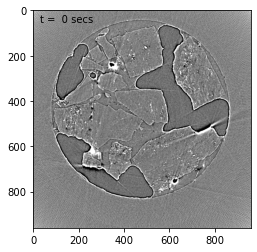

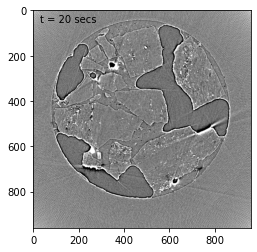

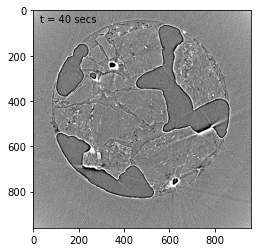

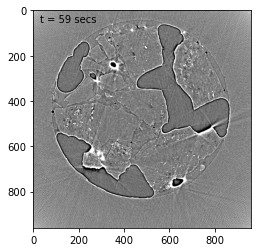

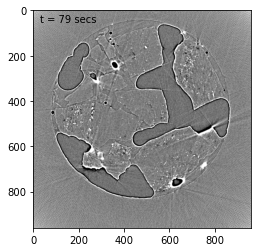

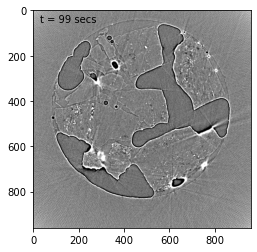

In [6]:
for ii in range(len(imgs)):
    fig, ax = plt.subplots(1,1)
    ax.imshow(imgs[ii], cmap = 'gray')
    ax.text(30,50,'t = %2.0f secs'%t_vals[ii])
    

In [7]:
delta_t

array([0.00549799])